In [18]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pprint
# mnist
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test  = mnist.test.images
y_test  = mnist.test.labels

# 檢視溝通
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# 檢視一個觀測值
print(np.argmax(y_train[9,:])) #第一章訓練照片的答案(傳回index)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)
8


MNIST 的圖片是 28 像素 x 28 像素，每一張圖片就可以用 28 x 28 = 784 個數字來紀錄，因此 print(x_train.shape) 的輸出告訴我們有 55,000 張訓練圖片，每張圖片都有 784 個數字；而 print(y_train.shape) 的輸出告訴我們的是這 55,000 張訓練圖片的真實答案，print(np.argmax(y_train[1, :])) 的輸出告訴我們第一張訓練圖片的真實答案為 3。

我們也可以使用 matplotlib.pyplot 把第一張訓練圖片印出來看看。

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


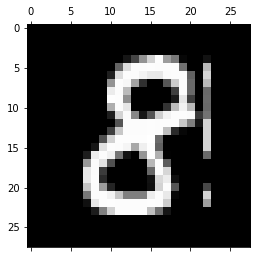

In [19]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#讀入 MNIST
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images

#印出來看看
first_train_img = np.reshape(x_train[9, :], (28, 28))
plt.matshow(first_train_img, cmap = plt.get_cmap('gray'))
plt.show()

輸入向量 [1,2,3,4,1,2,3]對應的Softmax函數的值為 [0.024,0.064,0.175,0.475,0.024,0.064,0.175]。輸出向量中擁有最大權重的項對應著輸入向量中的最大值「4」。這也顯示了這個函數通常的意義：對向量進行歸一化，凸顯其中最大的值並抑制遠低於最大值的其他分量。

In [24]:
import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]  
print(z_exp)  # Result: [2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09] 

sum_z_exp = sum(z_exp)  
print(sum_z_exp)  # Result: 114.98 

softmax = [round(i / sum_z_exp, 3) for i in z_exp]
print(softmax)  # Result: [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]

[2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 2.718281828459045, 7.38905609893065, 20.085536923187668]
114.98389973429897
[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]


### Softmax 函數

我們需要透過 Softmax 函數將分類器輸出的分數（Evidence）轉換為機率（Probability），然後依據機率作為預測結果的輸出，可想而知深度學習模型的輸出層會是一個 Softmax 函數。

### Cross-entropy

不同於我們先前使用 Mean Squared Error 定義 Loss，在這個深度學習模型中我們改用 Cross-entropy 來定義 Loss。

In [26]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# 讀入 MNIST
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

# 設定參數
learning_rate = 0.5
training_steps = 1000
batch_size = 100
logs_path = 'Tensorflow/'
n_features = x_train.shape[1]
n_labels = y_train.shape[1]

# 建立 Feeds
with tf.name_scope('Inputs'):
    x = tf.placeholder(tf.float32, [None, n_features], name = 'Input_Data')
with tf.name_scope('Labels'):
    y = tf.placeholder(tf.float32, [None, n_labels], name = 'Label_Data')

# 建立 Variables
with tf.name_scope('ModelParameters'):
    W = tf.Variable(tf.zeros([n_features, n_labels]), name = 'Weights')
    b = tf.Variable(tf.zeros([n_labels]), name = 'Bias')

# 開始建構深度學習模型
with tf.name_scope('Model'):
    # Softmax
    prediction = tf.nn.softmax(tf.matmul(x, W) + b)
with tf.name_scope('CrossEntropy'):
    # Cross-entropy
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(prediction), reduction_indices = 1))
    tf.summary.scalar("Loss", loss)
with tf.name_scope('GradientDescent'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('Accuracy', acc)

# 初始化
init = tf.global_variables_initializer()

# 開始執行運算
sess = tf.Session()
sess.run(init)

# 將視覺化輸出
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(logs_path, graph = tf.get_default_graph())

# 訓練
for step in range(training_steps):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys})
    if step % 50 == 0:
        print(sess.run(loss, feed_dict = {x: batch_xs, y: batch_ys}))
        summary = sess.run(merged, feed_dict = {x: batch_xs, y: batch_ys})
        writer.add_summary(summary, step)

print("---")
# 準確率
print("Accuracy: ", sess.run(acc, feed_dict={x: x_test, y: y_test}))

sess.close()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.82941
0.469246
0.289489
0.324289
0.257896
0.31448
0.181592
0.177683
0.195215
0.305716
0.306865
0.185438
0.175632
0.254565
0.275598
0.303582
0.209751
0.303232
0.479393
0.157202
---
Accuracy:  0.9181
